# COVID-19 Literature Clustering

### Goal
Given a large amount of literature and rapidly spreading COVID-19, it is difficult for a scientist to keep up with the research community promptly. Can we cluster similar research articles together to make it easier for health professionals to find relevant research articles? Clustering can be used to create a tool to identify similar articles, given a target article. It can also reduce the number of articles one has to go through as one can focus on a cluster of articles rather than all. 

### Dataset Description

>*In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 29,000 scholarly articles, including over 13,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.*

### Call to Action

>*We are issuing a call to action to the world's artificial intelligence experts to develop text and data mining tools that can help the medical community develop answers to high priority scientific questions. The CORD-19 dataset represents the most extensive machine-readable coronavirus literature collection available for data mining to date. This allows the worldwide AI research community the opportunity to apply text and data mining approaches to find answers to questions within, and connect insights across, this content in support of the ongoing COVID-19 response efforts worldwide. There is a growing urgency for these approaches because of the rapid increase in coronavirus literature, making it difficult for the medical community to keep up.*

>*A list of our initial key questions can be found under the Tasks section of this dataset. These key scientific questions are drawn from the NASEM’s SCIED (National Academies of Sciences, Engineering, and Medicine’s Standing Committee on Emerging Infectious Diseases and 21st Century Health Threats) research topics and the World Health Organization’s R&D Blueprint for COVID-19.*

>*Many of these questions are suitable for text mining, and we encourage researchers to develop text mining tools to provide insights on these questions.*

#### Cite: [COVID-19 Open Research Dataset Challenge (CORD-19) | Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)

**Clustering section of the project (cite):** *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

## Load the Data
Load the data following the notebook by Ivan Ega Pratama, from Kaggle.
#### Cite: [Dataset Parsing Code | Kaggle, COVID EDA: Initial Exploration Tool](https://www.kaggle.com/ivanegapratama/covid-eda-initial-exploration-tool)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import glob
import json

### Loading Metadata

In [2]:
root_path = 'data/2020-03-13/'
metadata_path = f'{root_path}/all_sources_metadata_2020-03-13.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2002765492,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3003430844,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3006065484,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,177663115,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3006643024,#3242,False


### Fetch All of JSON File Path

In [3]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

13202

### Helper: File Reader Class

In [4]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
            # Extend Here
            #
            #
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

8f8eb4f004c2002face0723f2f58cc411954d36e: Bordetella bronchiseptica isolate KM22 has been used in experimental infections of swine as a model of clinical B. bronchiseptica infection and to study host-to-host transmission. The draft genome seq... 20-kb insert library preparation protocol (https://www.pacb.com/wp-content/uploads/ Procedure-Checklist-20-kb-Template-Preparation-Using-BluePippin-Size-Selection -System.pdf). The 20-kb library was s...


### Load the Data into DataFrame

In [5]:
dict_ = {'paper_id': [], 'abstract': [], 'body_text': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    content = FileReader(entry)
    dict_['paper_id'].append(content.paper_id)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text'])
df_covid.head()

Processing index: 0 of 13202
Processing index: 1320 of 13202
Processing index: 2640 of 13202
Processing index: 3960 of 13202
Processing index: 5280 of 13202
Processing index: 6600 of 13202
Processing index: 7920 of 13202
Processing index: 9240 of 13202
Processing index: 10560 of 13202
Processing index: 11880 of 13202
Processing index: 13200 of 13202


,paper_id,abstract,body_text
0,8f8eb4f004c2002face0723f2f58cc411954d36e,Bordetella bronchiseptica isolate KM22 has bee...,20-kb insert library preparation protocol (htt...
1,63f7049d200896290b38b38711113054f7ea1b50,,I nfectious diseases have been an ever-present...
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,The influenza A nucleoprotein (NP) is an attra...,The transmission of a pathogenic avian H5N1 vi...
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,The outbreak of severe acute respiratory syndr...,acute lung injury; inflammatory response; neut...
4,3c3572ba243d61e7631725669c8f88347fdbd5bc,The prevalence of feline herpesvirus-1 (FHV-1)...,Feline herpesvirus type 1 (FHV-1) is the most ...


### Adding the Word Count Column

In [6]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count
0,8f8eb4f004c2002face0723f2f58cc411954d36e,Bordetella bronchiseptica isolate KM22 has bee...,20-kb insert library preparation protocol (htt...,44,345
1,63f7049d200896290b38b38711113054f7ea1b50,,I nfectious diseases have been an ever-present...,0,3427
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,The influenza A nucleoprotein (NP) is an attra...,The transmission of a pathogenic avian H5N1 vi...,200,3592
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,The outbreak of severe acute respiratory syndr...,acute lung injury; inflammatory response; neut...,255,3047
4,3c3572ba243d61e7631725669c8f88347fdbd5bc,The prevalence of feline herpesvirus-1 (FHV-1)...,Feline herpesvirus type 1 (FHV-1) is the most ...,93,1611


In [7]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13202 entries, 0 to 13201
Data columns (total 5 columns):
paper_id               13202 non-null object
abstract               13202 non-null object
body_text              13202 non-null object
abstract_word_count    13202 non-null int64
body_word_count        13202 non-null int64
dtypes: int64(2), object(3)
memory usage: 515.8+ KB


In [8]:
df_covid.describe(include='all')

,paper_id,abstract,body_text,abstract_word_count,body_word_count
count,13202,13202,13202,13202.000000,13202.000000
unique,13202,11113,13192,NaN,NaN
top,2892aee133b8b4037ace7ec6dfe6cab17e466292,,According to the World Health Organization (WH...,NaN,NaN
freq,1,2073,2,NaN,NaN
mean,NaN,NaN,NaN,210.911604,4259.200273
std,NaN,NaN,NaN,198.086664,4707.945123
min,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,112.000000,2477.250000
50%,NaN,NaN,NaN,200.000000,3717.000000
75%,NaN,NaN,NaN,271.000000,5363.750000


### Clean Duplicates

In [9]:
df_covid.drop_duplicates(['abstract'], inplace=True)
df_covid.describe(include='all')

,paper_id,abstract,body_text,abstract_word_count,body_word_count
count,11113,11113,11113,11113.000000,11113.000000
unique,11113,11113,11113,NaN,NaN
top,10c5b88204b337e7d05aceba5fc73d041153d0d3,and efficient antibody production. These resul...,"Zoonoses, or diseases of animal origin, are de...",NaN,NaN
freq,1,1,1,NaN,NaN
mean,NaN,NaN,NaN,250.366778,4465.941780
std,NaN,NaN,NaN,191.639090,4007.811003
min,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,162.000000,2806.000000
50%,NaN,NaN,NaN,220.000000,3966.000000
75%,NaN,NaN,NaN,288.000000,5563.000000


## Take a Look at the Data:

In [10]:
df_covid.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count
0,8f8eb4f004c2002face0723f2f58cc411954d36e,Bordetella bronchiseptica isolate KM22 has bee...,20-kb insert library preparation protocol (htt...,44,345
1,63f7049d200896290b38b38711113054f7ea1b50,,I nfectious diseases have been an ever-present...,0,3427
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,The influenza A nucleoprotein (NP) is an attra...,The transmission of a pathogenic avian H5N1 vi...,200,3592
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,The outbreak of severe acute respiratory syndr...,acute lung injury; inflammatory response; neut...,255,3047
4,3c3572ba243d61e7631725669c8f88347fdbd5bc,The prevalence of feline herpesvirus-1 (FHV-1)...,Feline herpesvirus type 1 (FHV-1) is the most ...,93,1611


## Data Pre-processing

Remove punctuation from each text:

In [11]:
import re

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

Convert each text to lower case:

In [12]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

In [13]:
df_covid.head(4)

,paper_id,abstract,body_text,abstract_word_count,body_word_count
0,8f8eb4f004c2002face0723f2f58cc411954d36e,bordetella bronchiseptica isolate km22 has bee...,20kb insert library preparation protocol https...,44,345
1,63f7049d200896290b38b38711113054f7ea1b50,,i nfectious diseases have been an everpresent ...,0,3427
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,the influenza a nucleoprotein np is an attract...,the transmission of a pathogenic avian h5n1 vi...,200,3592
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,the outbreak of severe acute respiratory syndr...,acute lung injury inflammatory response neutro...,255,3047


## Similar Articles

In [14]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count"], axis=1)

In [15]:
text.head(5)

,body_text
0,20kb insert library preparation protocol https...
1,i nfectious diseases have been an everpresent ...
2,the transmission of a pathogenic avian h5n1 vi...
3,acute lung injury inflammatory response neutro...
4,feline herpesvirus type 1 fhv1 is the most fre...


In [16]:
text_arr = text.stack().tolist()
len(text_arr)

11113

### 2-Grams:

In [17]:
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))

In [18]:
print(words[0][0])

20kb


In [19]:
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [20]:
n_gram_all[0][0]

'20kbinsert'

### Vectorize:

In [34]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12, stop_words='.')

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [35]:
X.shape

(11113, 4096)

#### Separete Training and Test Set

In [36]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print(" X_test size:", len(X_test), "\n")

X_train size: 8890
 X_test size: 2223 



### Dimensionality Reduction:
#### t-SNE

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8890 samples in 2.037s...
[t-SNE] Computed neighbors for 8890 samples in 563.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8890
[t-SNE] Computed conditional probabilities for sample 2000 / 8890
[t-SNE] Computed conditional probabilities for sample 3000 / 8890
[t-SNE] Computed conditional probabilities for sample 4000 / 8890
[t-SNE] Computed conditional probabilities for sample 5000 / 8890
[t-SNE] Computed conditional probabilities for sample 6000 / 8890
[t-SNE] Computed conditional probabilities for sample 7000 / 8890
[t-SNE] Computed conditional probabilities for sample 8000 / 8890
[t-SNE] Computed conditional probabilities for sample 8890 / 8890
[t-SNE] Mean sigma: 0.184867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 124.596054
[t-SNE] KL divergence after 1000 iterations: 3.349791


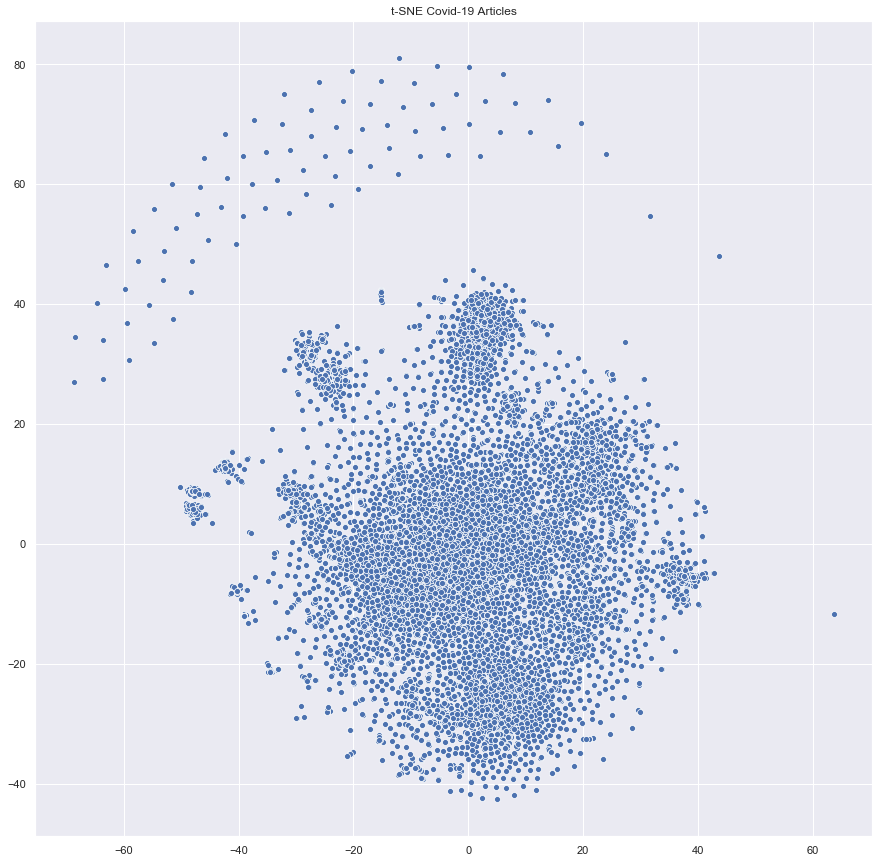

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
plt.savefig("plots/t-sne_covid19.png")

### Unsupervised Learning: Clustering

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting this section following the Chapter-9 project on O'REILLY's Hands-On Machine Learning. <br>

#### K-Means

In [39]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, n_jobs=4, verbose=10)
y_pred = kmeans.fit_predict(X_train)

In [40]:
y_pred

array([5, 1, 6, ..., 5, 1, 9], dtype=int32)

In [41]:
y_pred is kmeans.labels_

True

In [42]:
kmeans.cluster_centers_

array([[ 5.02533813e-01,  3.32241230e-04, -2.46354048e-03, ...,
         4.18004184e-04,  3.82715985e-03,  2.97981179e-03],
       [ 1.09519492e-02, -4.63310725e-05, -1.22922202e-03, ...,
        -2.16772619e-04,  2.33988520e-03,  3.37834696e-03],
       [ 1.04033865e-02,  2.72742862e-04, -2.45030485e-03, ...,
        -4.39348452e-04,  4.55001976e-03,  2.99229831e-03],
       ...,
       [ 1.37436072e-02,  8.01205733e-04, -2.29776395e-03, ...,
         8.51805485e-04,  4.19698846e-03,  4.29192830e-03],
       [ 6.77769111e-03, -5.71043347e-03, -2.45115035e-03, ...,
        -1.54393368e-03,  4.61543076e-03,  2.87258877e-03],
       [ 1.32004450e-02,  1.31985924e-03, -2.74415223e-03, ...,
         1.26379970e-03,  4.36038225e-03,  4.54469377e-03]])

In [43]:
kmeans.labels_

array([5, 1, 6, ..., 5, 1, 9], dtype=int32)

In [44]:
kmeans.predict(X_test)

array([9, 6, 2, ..., 2, 8, 6], dtype=int32)

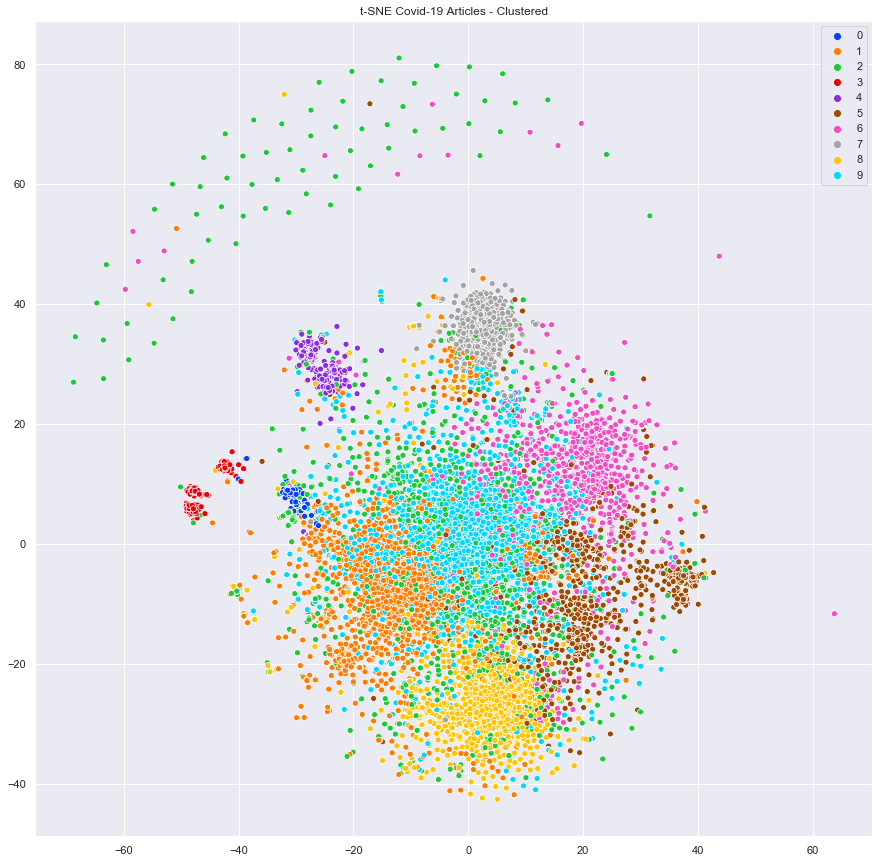

In [45]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.savefig("plots/t-sne_covid19_label.png")